In [5]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns

from PIL import Image

from os import listdir
from os.path import isfile, join
import numpy as np
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

In [6]:
os.listdir('/content/drive/MyDrive/Brain Tumer/brain_tumor_dataset')

['yes', 'no']

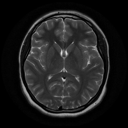

In [7]:
im =Image.open('/content/drive/MyDrive/Brain Tumer/brain_tumor_dataset/no/1 no.jpeg').resize((128,128))
im

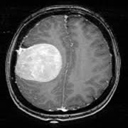

In [8]:
im =Image.open('/content/drive/MyDrive/Brain Tumer/brain_tumor_dataset/yes/Y1.jpg').resize((128,128))
im

In [9]:
yes=os.listdir('/content/drive/MyDrive/Brain Tumer/brain_tumor_dataset/yes')
no=os.listdir('/content/drive/MyDrive/Brain Tumer/brain_tumor_dataset/no')

In [10]:
data=np.concatenate([yes,no])
len(data)==len(yes)+len(no)

True

In [11]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)

True

In [12]:
len(data_target)==len(data)

True

In [13]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
data

array(['Y1.jpg', 'Y120.JPG', 'Y248.JPG', 'Y58.JPG', 'Y18.JPG', 'Y163.JPG',
       'Y162.jpg', 'Y108.jpg', 'Y187.jpg', 'Y148.JPG', 'Y55.jpg',
       'Y20.jpg', 'Y46.jpg', 'Y116.JPG', 'Y252.jpg', 'Y97.JPG', 'Y59.JPG',
       'Y14.jpg', 'Y112.JPG', 'Y107.jpg', 'Y165.JPG', 'Y66.JPG',
       'Y244.JPG', 'Y61.jpg', 'Y117.JPG', 'Y16.JPG', 'Y81.jpg',
       'Y180.jpg', 'Y44.JPG', 'Y62.jpg', 'Y86.JPG', 'Y69.jpg', 'Y9.jpg',
       'Y255.JPG', 'Y52.jpg', 'Y74.jpg', 'Y3.jpg', 'Y106.jpg', 'Y91.jpg',
       'Y8.jpg', 'Y10.jpg', 'Y99.JPG', 'Y71.JPG', 'Y249.JPG', 'Y85.JPG',
       'Y26.jpg', 'Y38.jpg', 'Y251.JPG', 'Y193.JPG', 'Y254.jpg',
       'Y15.jpg', 'Y104.jpg', 'Y256.JPG', 'Y42.jpg', 'Y253.JPG',
       'Y45.JPG', 'Y160.JPG', 'Y56.jpg', 'Y250.jpg', 'Y34.jpg',
       'Y257.jpg', 'Y90.jpg', 'Y29.jpg', 'Y92.png', 'Y111.JPG',
       'Y115.JPG', 'Y76.jpg', 'Y92.jpg', 'Y7.jpg', 'Y6.jpg', 'Y2.jpg',
       'Y28.jpg', 'Y195.JPG', 'Y155.JPG', 'Y51.jpg', 'Y96.jpg', 'Y12.jpg',
       'Y247.JPG', 'Y4.jpg', 'Y

In [15]:
yes_values=os.listdir('/content/drive/MyDrive/Brain Tumer/brain_tumor_dataset/yes')
no_values=os.listdir('/content/drive/MyDrive/Brain Tumer/brain_tumor_dataset/no')

In [16]:
X_data =[]
for file in yes_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('/content/drive/MyDrive/Brain Tumer/brain_tumor_dataset/yes/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face)
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [17]:
#X_data =[]
for file in no_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('/content/drive/MyDrive/Brain Tumer/brain_tumor_dataset/no/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face)
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [18]:
len(X_data)==len(data)==len(data_target)

True

In [19]:
X = np.squeeze(X_data)


In [20]:
X.shape


(253, 32, 32, 3)

In [21]:
# normalize data
X = X.astype('float32')
X /= 255

In [22]:
#categorical_labels = to_categorical(data_target, num_classes=2)


In [23]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
(x_train, y_train), (x_test, y_test) = (X[:190],data_target[:190]) , (X[190:] , data_target[190:])
(x_valid , y_valid) = (x_test[:63], y_test[:63])
#(x_test, y_test) = (x_test[63:], y_test[63:])

In [25]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        3904      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        20752     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 16)          0

In [26]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [27]:
model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=150,
         validation_data=(x_valid, y_valid),)

Epoch 1/150
2/2 [==============================] - 4s 1s/step - loss: 0.6656 - acc: 0.4474 - val_loss: 1.4618 - val_acc: 0.0000e+00
Epoch 2/150
2/2 [==============================] - 2s 1s/step - loss: 0.4836 - acc: 0.8158 - val_loss: 1.1407 - val_acc: 0.0000e+00
Epoch 3/150
2/2 [==============================] - 1s 493ms/step - loss: 0.4558 - acc: 0.8158 - val_loss: 1.0103 - val_acc: 0.0000e+00
Epoch 4/150
2/2 [==============================] - 1s 504ms/step - loss: 0.4523 - acc: 0.8158 - val_loss: 1.1524 - val_acc: 0.0000e+00
Epoch 5/150
2/2 [==============================] - 1s 431ms/step - loss: 0.4596 - acc: 0.8158 - val_loss: 1.0785 - val_acc: 0.0000e+00
Epoch 6/150
2/2 [==============================] - 1s 440ms/step - loss: 0.4539 - acc: 0.8158 - val_loss: 0.9392 - val_acc: 0.0000e+00
Epoch 7/150
2/2 [==============================] - 1s 444ms/step - loss: 0.4388 - acc: 0.8158 - val_loss: 1.1554 - val_acc: 0.0000e+00
Epoch 8/150
2/2 [==============================] - 1s 506ms/s

In [28]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6190476417541504


In [29]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]

2/2 [==============================] - 0s 47ms/step


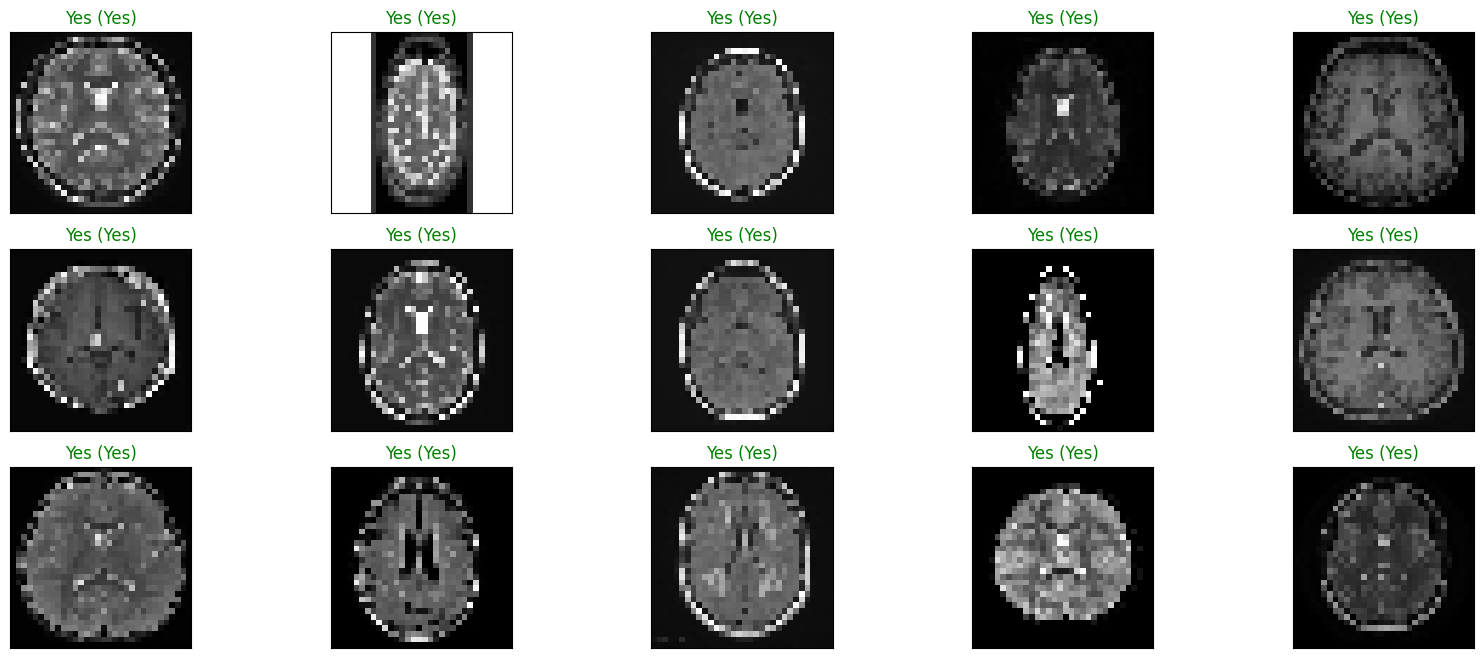

In [30]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index],
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

In [33]:
from tensorflow.keras.models import save_model
save_model(model, "mode.hdf5")

In [35]:
import numpy as np
import keras
import keras.utils as image
from tensorflow.keras.models import load_model
modelsss = load_model("/content/mod1.hdf5")

imgs = image.load_img("/content/drive/MyDrive/Brain Tumer/yes/Y1.jpg", target_size=(32,32))
img_tensor = image.img_to_array(imgs)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor = img_tensor/.255

predi = modelsss.predict(img_tensor)
print(predi.argmax())

1/1 [==============================] - 1s 504ms/step
0
